## SHAPE AI
# Python and Data Analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sis
import sklearn

In [ ]:
Df = pd.read_csv("Train.csv")

1. Pclass: Passenger Class (1= 1st; 2= 2nd; 3= 3rd) 
2. Survival: Survival (0=No;1=Yes) 
3. Name: Name 
1. Sex: Sex 
1. Age: Age 
1. Sibsp: Number of Siblings/Spouses Aboard 
1. Parch: Number of Parents/Children Aboard 
1. Ticket: Ticket Number 
1. Fare: Passenger Fare (British pound) 
1. Cabin: Cabin
1. Embarked: Port of Embarkation ( C= Cherbourg; Q= Queenstown; S= Southampton)

In [ ]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
Df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
Df.shape

(891, 12)

In [ ]:
Df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Df.size

10692

In [ ]:
Df.ndim

2

In [ ]:
Df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Df.drop(columns="Cabin",axis=1,inplace=True)

In [ ]:
Df.shape

(891, 11)

In [ ]:
Df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
Df.fillna(Df.mean(),inplace=True)
Df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
Df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
Df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
Df.fillna("S",inplace=True)
Df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
print("Number of Siblings -",Df.SibSp.sum())

Number of Siblings - 466


In [ ]:
print("Number of Parents",Df.Parch.sum())

Number of Parents 340


In [ ]:
Df["Family_Memb"] = Df.SibSp + Df.Parch

In [ ]:
Df.drop(columns="SibSp",axis=1,inplace=True)

In [ ]:
Df.drop(columns="Parch",axis=1,inplace=True)

In [ ]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Memb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


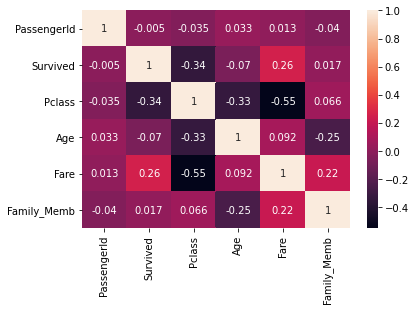

In [ ]:
sis.heatmap(Df.corr(),annot=True)

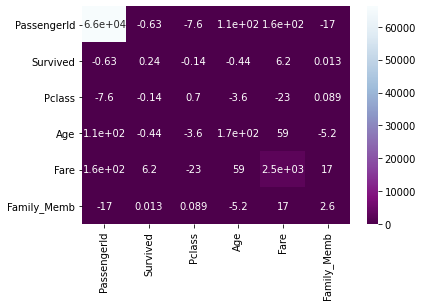

In [ ]:
sis.heatmap(Df.cov(),annot=True,cmap="BuPu_r")

In [ ]:
Df["Alone"] = [0 if Df["Family_Memb"][I] > 0 else 1 for I in Df.index]

In [ ]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Memb,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
print("Total Survival -",Df.Survived.sum())

Total Survival - 342


In [ ]:
print("Total_Collection -",Df.Fare.sum())

Total_Collection - 28693.9493


In [ ]:
print("Total Passenger -",Df.Name.count())

Total Passenger - 891


In [ ]:
print("Total % of Survival -",((Df.Survived.sum())/Df.Name.count())*100)

Total % of Survival - 38.38383838383838


In [ ]:
print("Survival by Gender",Df.groupby(["Sex"])["Survived"].mean())

Survival by Gender Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
